In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
df =pd.read_csv('/content/gdrive/MyDrive/Hotel_Reviews.csv')
df

In [ ]:
df.isnull().sum()

In [6]:
df.isnull().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [8]:
df.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,8.395077,49.442439,2.823803
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,1.637856,3.466325,4.579425
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214662,-0.143372
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,0.010607
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


In [9]:
df.shape

(515738, 17)

In [10]:
df['Hotel_Name'].unique()

array(['Hotel Arena', 'K K Hotel George', 'Apex Temple Court Hotel', ...,
       'The Berkeley', 'Holiday Inn London Kensington',
       'Atlantis Hotel Vienna'], dtype=object)

In [11]:
df.head(1)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968


In [12]:
#1) How many reviewers from each nation

  #a. Highest reviewers from which nationality

  #b. Lowest Reviewers from which nationality

In [13]:
#1) How many reviewers from each nation

reviewers = df['Reviewer_Nationality'].value_counts()
reviewers

 United Kingdom               245246
 United States of America      35437
 Australia                     21686
 Ireland                       14827
 United Arab Emirates          10235
                               ...  
 Cape Verde                        1
 Northern Mariana Islands          1
 Tuvalu                            1
 Guinea                            1
 Palau                             1
Name: Reviewer_Nationality, Length: 227, dtype: int64

In [14]:
#a. Highest reviewers from which nationality

high_reviewer = reviewers.idxmax()
high_reviewer

' United Kingdom '

In [15]:
#b. Lowest Reviewers from which nationality

low_reviewer = reviewers.idxmin()
low_reviewer

' Svalbard Jan Mayen '

In [16]:
#2) Property with best review_score overall and least score overall

property_avg_scores = df.groupby('Hotel_Name')['Reviewer_Score'].mean()

best_score_property = property_avg_scores.idxmax()
least_score_property = property_avg_scores.idxmin()
print('Property with best review_score is:-', best_score_property)
print('Property with least review_score is:-', least_score_property)

Property with best review_score is:- Ritz Paris
Property with least review_score is:- Hotel Liberty


In [17]:
import pandas as pd

property_groups = df.groupby('Hotel_Name')

mean_lat = property_groups['lat'].transform('mean')
mean_lng = property_groups['lng'].transform('mean')

df['lat'] = df['lat'].fillna(mean_lat)
df['lng'] = df['lng'].fillna(mean_lng)

In [18]:
df.isnull().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

In [19]:
df.fillna(0, axis=1, inplace = True)

In [20]:
X = X=df.drop(columns=['Hotel_Address','Additional_Number_of_Scoring','Review_Date','Average_Score','Tags','days_since_review','Reviewer_Score','Negative_Review','Positive_Review','Hotel_Name','Reviewer_Nationality'],axis=1)
y=df['Reviewer_Score']

In [21]:
X

,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,lat,lng
0,397,1403,11,7,52.360576,4.915968
1,0,1403,105,7,52.360576,4.915968
2,42,1403,21,9,52.360576,4.915968
3,210,1403,26,1,52.360576,4.915968
4,140,1403,8,3,52.360576,4.915968
...,...,...,...,...,...,...
515733,14,2823,2,8,48.203745,16.335677
515734,11,2823,11,12,48.203745,16.335677
515735,19,2823,0,3,48.203745,16.335677
515736,0,2823,25,3,48.203745,16.335677


In [22]:
y

0         2.9
1         7.5
2         7.1
3         3.8
4         6.7
         ... 
515733    7.0
515734    5.8
515735    2.5
515736    8.8
515737    8.3
Name: Reviewer_Score, Length: 515738, dtype: object

Text(0.5, 1.0, 'Properties by Latitude and Longitude')

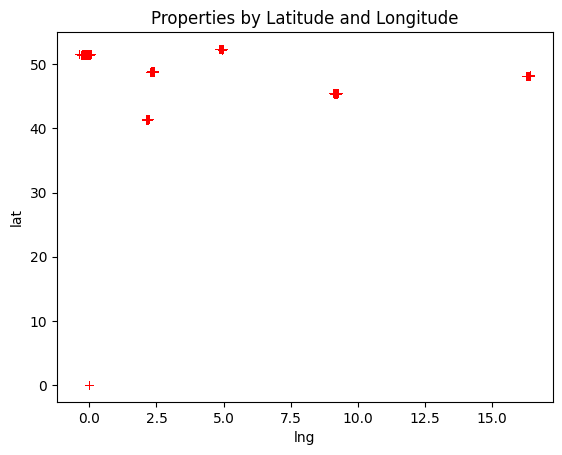

In [23]:
#Do a scatter plot to show all properties over lat and long

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='lng', y='lat', data=df,  color='red', marker='+')
plt.title('Properties by Latitude and Longitude')

4) Which property has highest reviews and lowest  in last 1 month of the dataset maximum date

In [25]:
#Convert the 'Review_Date' column to a datetime format.
#find the maximum date in the dataset.
#calculate the date one month ago from the maximum date.
#filter the dataset to include only the data from the last month.
#find the property with the highest and lowest reviews in the last month based on the 'Total_Number_of_Reviews' column.

import pandas as pd

df['Review_Date'] = pd.to_datetime(df['Review_Date'])

max_date = df['Review_Date'].max()

one_month_ago = max_date - pd.DateOffset(months=1)

last_month_data = df[df['Review_Date'] >= one_month_ago]

max_reviews = last_month_data['Total_Number_of_Reviews'].max()
property_with_highest_reviews = last_month_data[last_month_data['Total_Number_of_Reviews'] == max_reviews]['Hotel_Name'].values[0]

min_reviews = last_month_data['Total_Number_of_Reviews'].min()
property_with_lowest_reviews = last_month_data[last_month_data['Total_Number_of_Reviews'] == min_reviews]['Hotel_Name'].values[0]

print("Property with the highest reviews in the last month:", property_with_highest_reviews)
print("Property with the lowest reviews in the last month:", property_with_lowest_reviews)


Property with the highest reviews in the last month: Hotel Da Vinci
Property with the lowest reviews in the last month: The Henrietta Hotel


**Concatenating 'Postive Review' and 'Negative Review' Columns from first two rows.**

In [26]:
row1 = df.loc[0, 'Positive_Review'] + df.loc[0, 'Negative_Review']
row2 = df.loc[1, 'Positive_Review'] + df.loc[1, 'Negative_Review']

In [27]:
row1

' Only the park outside of the hotel was beautiful  I am so angry that i made this post available via all possible sites i use when planing my trips so no one will make the mistake of booking this place I made my booking via booking com We stayed for 6 nights in this hotel from 11 to 17 July Upon arrival we were placed in a small room on the 2nd floor of the hotel It turned out that this was not the room we booked I had specially reserved the 2 level duplex room so that we would have a big windows and high ceilings The room itself was ok if you don t mind the broken window that can not be closed hello rain and a mini fridge that contained some sort of a bio weapon at least i guessed so by the smell of it I intimately asked to change the room and after explaining 2 times that i booked a duplex btw it costs the same as a simple double but got way more volume due to the high ceiling was offered a room but only the next day SO i had to check out the next day before 11 o clock in order to g

In [28]:
row2

' No real complaints the hotel was great great location surroundings rooms amenities and service Two recommendations however firstly the staff upon check in are very confusing regarding deposit payments and the staff offer you upon checkout to refund your original payment and you can make a new one Bit confusing Secondly the on site restaurant is a bit lacking very well thought out and excellent quality food for anyone of a vegetarian or vegan background but even a wrap or toasted sandwich option would be great Aside from those minor minor things fantastic spot and will be back when i return to Amsterdam No Negative'

In [29]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [30]:
from nltk.tokenize import word_tokenize

In [31]:
w1 =word_tokenize(row1)

In [32]:
w2 = word_tokenize(row2)

In [33]:
from nltk.tokenize import sent_tokenize

In [34]:
s1 = nltk.sent_tokenize(row1)

In [35]:
s1

[' Only the park outside of the hotel was beautiful  I am so angry that i made this post available via all possible sites i use when planing my trips so no one will make the mistake of booking this place I made my booking via booking com We stayed for 6 nights in this hotel from 11 to 17 July Upon arrival we were placed in a small room on the 2nd floor of the hotel It turned out that this was not the room we booked I had specially reserved the 2 level duplex room so that we would have a big windows and high ceilings The room itself was ok if you don t mind the broken window that can not be closed hello rain and a mini fridge that contained some sort of a bio weapon at least i guessed so by the smell of it I intimately asked to change the room and after explaining 2 times that i booked a duplex btw it costs the same as a simple double but got way more volume due to the high ceiling was offered a room but only the next day SO i had to check out the next day before 11 o clock in order to 

In [36]:
s2 = nltk.sent_tokenize(row2)

In [37]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('all')

In [39]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

lemma1 = [lemmatizer.lemmatize(word) for word in s1]

print(lemma1)

[' Only the park outside of the hotel was beautiful  I am so angry that i made this post available via all possible sites i use when planing my trips so no one will make the mistake of booking this place I made my booking via booking com We stayed for 6 nights in this hotel from 11 to 17 July Upon arrival we were placed in a small room on the 2nd floor of the hotel It turned out that this was not the room we booked I had specially reserved the 2 level duplex room so that we would have a big windows and high ceilings The room itself was ok if you don t mind the broken window that can not be closed hello rain and a mini fridge that contained some sort of a bio weapon at least i guessed so by the smell of it I intimately asked to change the room and after explaining 2 times that i booked a duplex btw it costs the same as a simple double but got way more volume due to the high ceiling was offered a room but only the next day SO i had to check out the next day before 11 o clock in order to 

In [40]:
from nltk.stem import PorterStemmer
stemmer = nltk.stem.PorterStemmer()

stem1 = [stemmer.stem(token) for token in s1]
print(stem1)

[' only the park outside of the hotel was beautiful  i am so angry that i made this post available via all possible sites i use when planing my trips so no one will make the mistake of booking this place i made my booking via booking com we stayed for 6 nights in this hotel from 11 to 17 july upon arrival we were placed in a small room on the 2nd floor of the hotel it turned out that this was not the room we booked i had specially reserved the 2 level duplex room so that we would have a big windows and high ceilings the room itself was ok if you don t mind the broken window that can not be closed hello rain and a mini fridge that contained some sort of a bio weapon at least i guessed so by the smell of it i intimately asked to change the room and after explaining 2 times that i booked a duplex btw it costs the same as a simple double but got way more volume due to the high ceiling was offered a room but only the next day so i had to check out the next day before 11 o clock in order to 

In [41]:
df['combined_reviews'] = df['Negative_Review']  + df['Positive_Review']

In [42]:
df.head(1)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,combined_reviews
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,I am so angry that i made this post available...


In [43]:
words = df.loc[:,'combined_reviews']

In [44]:
tokenized_words = words.str.lower()

In [45]:
tokens = nltk.word_tokenize(str(tokenized_words))

In [46]:
stopwords = nltk.corpus.stopwords.words("english")

In [47]:
filtered_words = [word for word in tokens if word.lower() not in [stopword.lower() for stopword in stopwords]]

In [ ]:
filtered_words

In [49]:
import string

no_punctuation = [word for word in tokens if word not in string.punctuation]

In [ ]:
no_punctuation

In [51]:
stemmer = nltk.stem.PorterStemmer()

# stem each token
stemmed_tokens = [stemmer.stem(token) for token in tokens]

print("Stemmed tokens:", stemmed_tokens)

Stemmed tokens: ['0', 'i', 'am', 'so', 'angri', 'that', 'i', 'made', 'thi', 'post', 'avail', '...', '1', 'no', 'neg', 'no', 'real', 'complaint', 'the', 'hotel', 'wa', 'g', '...', '2', 'room', 'are', 'nice', 'but', 'for', 'elderli', 'a', 'bit', 'difficul', '...', '3', 'my', 'room', 'wa', 'dirti', 'and', 'i', 'wa', 'afraid', 'to', 'walk', 'ba', '...', '4', 'you', 'when', 'i', 'book', 'with', 'your', 'compani', 'on', 'line', 'y', '...', '...', '515733', 'no', 'trolli', 'or', 'staff', 'to', 'help', 'you', 'take', 'the', 'lugga', '...', '515734', 'the', 'hotel', 'look', 'like', '3', 'but', 'sure', 'not', '4', 'brea', '...', '515735', 'the', 'ac', 'wa', 'useless', 'it', 'wa', 'a', 'hot', 'week', 'in', 'vienn', '...', '515736', 'no', 'neg', 'the', 'room', 'are', 'enorm', 'and', 'realli', '...', '515737', 'i', 'wa', 'in', '3rd', 'floor', 'it', 'didn', 't', 'work', 'free', 'wife', '...', 'name', ':', 'combined_review', ',', 'length', ':', '515738', ',', 'dtype', ':', 'object']


In [52]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

lemma = [lemmatizer.lemmatize(word) for word in tokens]

print(lemma)

['0', 'i', 'am', 'so', 'angry', 'that', 'i', 'made', 'this', 'post', 'available', '...', '1', 'no', 'negative', 'no', 'real', 'complaint', 'the', 'hotel', 'wa', 'g', '...', '2', 'room', 'are', 'nice', 'but', 'for', 'elderly', 'a', 'bit', 'difficul', '...', '3', 'my', 'room', 'wa', 'dirty', 'and', 'i', 'wa', 'afraid', 'to', 'walk', 'ba', '...', '4', 'you', 'when', 'i', 'booked', 'with', 'your', 'company', 'on', 'line', 'y', '...', '...', '515733', 'no', 'trolly', 'or', 'staff', 'to', 'help', 'you', 'take', 'the', 'lugga', '...', '515734', 'the', 'hotel', 'look', 'like', '3', 'but', 'surely', 'not', '4', 'brea', '...', '515735', 'the', 'ac', 'wa', 'useless', 'it', 'wa', 'a', 'hot', 'week', 'in', 'vienn', '...', '515736', 'no', 'negative', 'the', 'room', 'are', 'enormous', 'and', 'really', '...', '515737', 'i', 'wa', 'in', '3rd', 'floor', 'it', 'didn', 't', 'work', 'free', 'wife', '...', 'Name', ':', 'combined_reviews', ',', 'Length', ':', '515738', ',', 'dtype', ':', 'object']


In [53]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [54]:
#Lemmitization Vectorizer

vectorizer = CountVectorizer()
X_lemmatized = vectorizer.fit_transform(lemma)
feature_names = vectorizer.get_feature_names_out()

In [55]:
feature_names

array(['3rd', '515733', '515734', '515735', '515736', '515737', '515738',
       'ac', 'afraid', 'am', 'and', 'angry', 'are', 'available', 'ba',
       'bit', 'booked', 'brea', 'but', 'combined_reviews', 'company',
       'complaint', 'didn', 'difficul', 'dirty', 'dtype', 'elderly',
       'enormous', 'floor', 'for', 'free', 'help', 'hot', 'hotel', 'in',
       'it', 'length', 'like', 'line', 'look', 'lugga', 'made', 'my',
       'name', 'negative', 'nice', 'no', 'not', 'object', 'on', 'or',
       'post', 'real', 'really', 'room', 'so', 'staff', 'surely', 'take',
       'that', 'the', 'this', 'to', 'trolly', 'useless', 'vienn', 'wa',
       'walk', 'week', 'when', 'wife', 'with', 'work', 'you', 'your'],
      dtype=object)

In [56]:
#Stemming Vectorizer

vectorizer = CountVectorizer()
X_stemmed = vectorizer.fit_transform(stemmed_tokens)
feature_name = vectorizer.get_feature_names_out()
feature_name

array(['3rd', '515733', '515734', '515735', '515736', '515737', '515738',
       'ac', 'afraid', 'am', 'and', 'angri', 'are', 'avail', 'ba', 'bit',
       'book', 'brea', 'but', 'combined_review', 'compani', 'complaint',
       'didn', 'difficul', 'dirti', 'dtype', 'elderli', 'enorm', 'floor',
       'for', 'free', 'help', 'hot', 'hotel', 'in', 'it', 'length',
       'like', 'line', 'look', 'lugga', 'made', 'my', 'name', 'neg',
       'nice', 'no', 'not', 'object', 'on', 'or', 'post', 'real',
       'realli', 'room', 'so', 'staff', 'sure', 'take', 'that', 'the',
       'thi', 'to', 'trolli', 'useless', 'vienn', 'wa', 'walk', 'week',
       'when', 'wife', 'with', 'work', 'you', 'your'], dtype=object)

In [57]:
# Count MAtrix for Lemmitization
import pandas as pd
count_matrix_df = pd.DataFrame(X_lemmatized.toarray(), columns=feature_names)
count_matrix_df

,3rd,515733,515734,515735,515736,515737,515738,ac,afraid,am,...,vienn,wa,walk,week,when,wife,with,work,you,your
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
128,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
## Count MAtrix for Stemming
import pandas as pd
count_matrix_df1 = pd.DataFrame(X_stemmed.toarray(), columns=feature_name)
count_matrix_df1

,3rd,515733,515734,515735,515736,515737,515738,ac,afraid,am,...,vienn,wa,walk,week,when,wife,with,work,you,your
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
128,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
count_matrix_df['3rd'].value_counts()

0    130
1      1
Name: 3rd, dtype: int64

In [62]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_lemmatized = vectorizer.fit_transform(lemma)
X_stemmed = vectorizer.fit_transform(stemmed_tokens)

# Train and test a classifier on the lemmatized and stemmed datasets
# Create a range of labels from 0 to 130 (131 labels)

labels = list(range(131))

X_train, X_test, y_train, y_test = train_test_split(X_lemmatized, labels, test_size=0.2)

model_lemmatized = MultinomialNB()
model_lemmatized.fit(X_train, y_train)
y_pred_lemmatized = model_lemmatized.predict(X_test)
accuracy_lemmatized = accuracy_score(y_test, y_pred_lemmatized)

In [63]:
print(len(labels))

131


In [64]:
accuracy_lemmatized

0.0

In [65]:
y_pred_lemmatized

array([ 2,  6,  6,  2,  2,  6,  6,  2,  2,  6,  2,  6,  6,  2,  6,  6,  6,
       13, 20,  6,  2, 18,  6,  2, 43,  2,  2])

In [67]:
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(120, activation='softmax')
])

In [ ]:
df.head()

In [69]:
df['Reviewer_Score'] = df['Reviewer_Score'].astype(int)

In [70]:
df.head(1)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,combined_reviews
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,I am so angry that i made this post available...


In [71]:
df['Reviewer_Score'] = df['Reviewer_Score'].round().astype(int)
df['Reviewer_Score'] = df['Reviewer_Score'].clip(0, 10)

In [72]:
df.head(1)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,combined_reviews
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,I am so angry that i made this post available...


In [73]:
X = X=df.drop(columns=['Hotel_Address','Additional_Number_of_Scoring','Review_Date','Average_Score','Tags','days_since_review','Reviewer_Score','Negative_Review','Positive_Review','Hotel_Name','Reviewer_Nationality','combined_reviews'],axis=1)
y=df['Reviewer_Score']

In [ ]:
X

In [75]:
y

0         2
1         7
2         7
3         3
4         6
         ..
515733    7
515734    5
515735    2
515736    8
515737    8
Name: Reviewer_Score, Length: 515738, dtype: int64

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

In [77]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [78]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [79]:
model.predict(X_test)

array([ 7, 10,  9, ...,  9,  5,  9])

In [80]:
model.score(X_test,y_test)

0.3301866671098591

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer #For Lemmitized words
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(lemma)

feature_names = tfidf_vectorizer.get_feature_names_out()
import pandas as pd

tfidf_matrix_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
tfidf_matrix_df

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer # For Stemming Words
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(stemmed_tokens)

feature_names = tfidf_vectorizer.get_feature_names_out()
import pandas as pd

tfidf_matrix_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
tfidf_matrix_df

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer #For Lemmitized words
count_vectorizer = CountVectorizer()

count_matrix = count_vectorizer.fit_transform(lemma)
count_array = count_matrix.toarray()
terms = count_vectorizer.get_feature_names_out()
print("Terms:", terms)

print("Count Matrix:")
print(count_array)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer # For Stemming Words
count_vectorizer = CountVectorizer()

count_matrix = count_vectorizer.fit_transform(stemmed_tokens)
count_array = count_matrix.toarray()
terms = count_vectorizer.get_feature_names_out()
print("Terms:", terms)

print("Count Matrix:")
print(count_array)